# 2. Modèle de base avec Scikit-learn sur MNIST

## Objectif

Dans ce notebook, nous allons :  

1. Charger et préparer les données MNIST (déjà nettoyées et séparées). 
2. Créer un modèle de classification simple avec Scikit-learn. 
3. Évaluer ses performances. 
4. Visualiser les résultats. 

## Pourquoi cette étape ?

Cela permet d’obtenir une référence de performance avant de passer à une implémentation from scratch.

## 1. Importation des librairies

Nous allons importer les librairies nécessaires pour entraîner et évaluer un modèle Scikit-learn.  
On utilisera :  

- NumPy pour les calculs
- Matplotlib pour les graphiques
- Scikit-learn pour le modèle et l’évaluation

In [10]:
import numpy as np # Manipulation de données numériques
import matplotlib.pyplot as plt # Visualisation des résultats
from sklearn.linear_model import LogisticRegression # Modèle de régression logistique
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay # Évaluation du modèle

print("Librairies importées avec succès !")

Librairies importées avec succès !


## 2. Chargement et préparation des données

In [11]:
from sklearn.datasets import fetch_openml # Pour télécharger MNIST
from sklearn.model_selection import train_test_split # Pour séparer les données

# Chargement du dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # Télécharge les images et labels
X, y = mnist.data, mnist.target.astype(int) # X = images, y = labels

# Normalisation des pixels entre 0 et 1
X_norm = X / 255.0

# Séparation en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42 # 20% test, 80% train, random_state pour reproductibilité
)

print(f"X_train : {X_train.shape} | y_train : {y_train.shape}") # Affiche la taille du jeu d'entraînement
print(f"X_test  : {X_test.shape}  | y_test  : {y_test.shape}")  # Affiche la taille du jeu de test

X_train : (56000, 784) | y_train : (56000,)
X_test  : (14000, 784)  | y_test  : (14000,)


## 3. Création et entraînement du modèle Scikit-learn

Nous allons maintenant créer un modèle de régression logistique (LogisticRegression), un des modèles les plus simples et efficaces pour la classification.
On va l’entraîner sur notre jeu d’entraînement, puis mesurer sa performance sur le jeu de test.

### Pourquoi utiliser la régression logistique ? Existe-t-il d’autres modèles ?

Pour cette première approche, nous avons choisi la **régression logistique** car c’est un modèle de classification simple, rapide à entraîner et facile à interpréter. Elle sert souvent de point de départ (baseline) pour évaluer la difficulté d’un problème de classification. Sur des données bien structurées comme MNIST, elle donne déjà de bons résultats.

Cependant, il existe de nombreux autres modèles adaptés à la classification d’images :

- **k-Nearest Neighbors (k-NN)** : classe une image en fonction de ses voisines les plus proches.
- **Support Vector Machines (SVM)** : cherche à séparer les classes avec des frontières optimales.
- **Arbres de décision et forêts aléatoires (Random Forests)** : utilisent des ensembles d’arbres pour prendre des décisions.
- **Réseaux de neurones (MLP, CNN)** : modèles plus avancés, capables de reconnaître des motifs complexes dans les images.

**En résumé :**  
La régression logistique est une excellente référence de départ, mais d’autres modèles, notamment les réseaux de neurones, peuvent offrir de meilleures performances sur des images plus complexes.

In [12]:
# Création du modèle de régression logistique
model = LogisticRegression(max_iter=300, solver='lbfgs', verbose=1, n_jobs=-1) # max_iter=100 pour limiter le temps d'entraînement, verbose=1 Scikit-learn affiche les étapes de l’algorithme d’optimisation, n_jobs=-1 pour utiliser tous les cœurs du processeur

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train) # Apprend à reconnaître les chiffres à partir des images

print("Modèle entraîné avec succès !")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  6.35079D-02


 This problem is unconstrained.



At iterate   50    f=  2.58162D-01    |proj g|=  1.16985D-03

At iterate  100    f=  2.36823D-01    |proj g|=  1.83902D-03

At iterate  150    f=  2.30741D-01    |proj g|=  3.07555D-04

At iterate  200    f=  2.28273D-01    |proj g|=  1.72765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7850    242    262      1     0     0   9.516D-05   2.274D-01
  F =  0.22737731530272692     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Modèle entraîné avec succès !


## 4. Évaluation du modèle

Nous allons maintenant mesurer la performance de notre modèle sur le jeu de test.
On va calculer la précision (accuracy) et afficher la matrice de confusion pour voir comment le modèle se débrouille sur chaque chiffre.

Précision du modèle sur le jeu de test : 0.9203


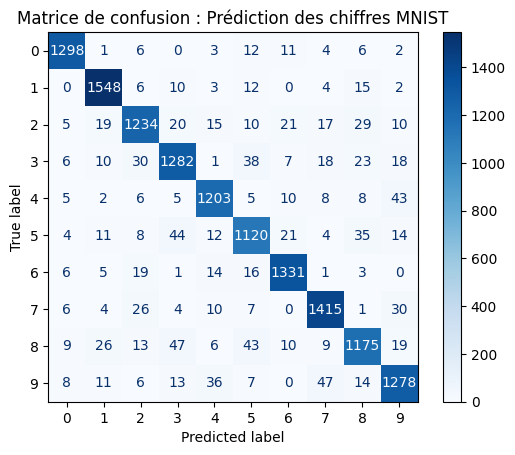

In [13]:
# Prédiction sur le jeu de test
y_pred = model.predict(X_test) # Prédit les labels pour les images de test

# Calcul de la précision (accuracy)
accuracy = accuracy_score(y_test, y_pred) # Compare les labels prédits aux vrais labels
print(f"Précision du modèle sur le jeu de test : {accuracy:.4f}")

# Affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred) # Calcule la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10)) # Prépare l'affichage
disp.plot(cmap='Blues') # Affiche la matrice de confusion en bleu
plt.title("Matrice de confusion : Prédiction des chiffres MNIST")
plt.show()

### Qu’est-ce qu’une matrice de confusion ?  

C’est un tableau qui permet de visualiser les performances d’un modèle de classification. Elle compare les prédictions du modèle avec les vraies valeurs (les labels réels).

### Comment lire la matrice de confusion (pour MNIST) ?  

- Chaque ligne correspond à la vraie classe (le vrai chiffre écrit à la main).
- Chaque colonne correspond à la classe prédite par le modèle.
- La diagonale (du haut-gauche au bas-droite) montre les cas où le modèle a bien prédit (prédiction correcte).
- Les cases hors diagonale montrent les erreurs (par exemple, un “5” prédit comme un “3”).

## 5. Visualisation des erreurs du modèle

Pour progresser, il est utile de regarder quelques exemples d’images mal classées par le modèle. Cela permet de comprendre où il se trompe et pourquoi.

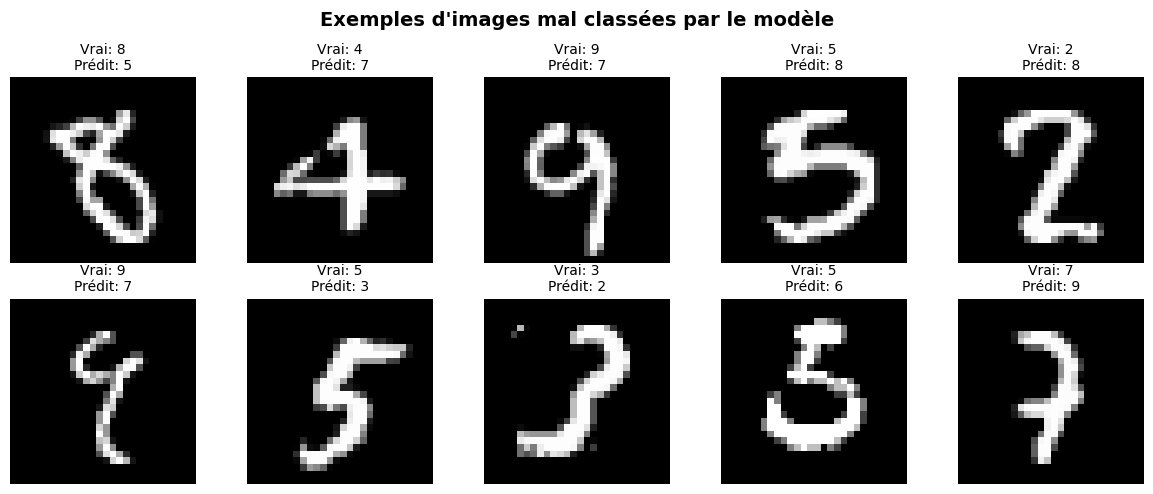

In [14]:
# Trouver les indices des erreurs de prédiction
erreurs = np.where(y_test != y_pred)[0] # Indices où la prédiction est différente du vrai label

# Afficher 10 exemples d'erreurs
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) # Crée une grille 2x5

for i, ax in enumerate(axes.flat):
    idx = erreurs[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray') # Affiche l'image mal classée
    ax.set_title(f"Vrai: {y_test[idx]}\nPrédit: {y_pred[idx]}", fontsize=10)
    ax.axis('off')

plt.suptitle("Exemples d'images mal classées par le modèle", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Rapport du modèle de base Scikit-learn sur MNIST

## 1. Chargement et préparation des données. 

- Le dataset MNIST a été téléchargé et chargé avec Scikit-learn.
- Les images ont été normalisées (valeurs entre 0 et 1).
- Les données ont été séparées en jeux d’entraînement (80 %) et de test (20 %).

## 2. Entraînement du modèle. 

- Un modèle de régression logistique a été entraîné sur les données d’entraînement.
- L’entraînement a convergé après plusieurs itérations.

## 3. Évaluation et analyse des résultats. 

- La précision obtenue sur le jeu de test est de **0.9203%**
- La matrice de confusion montre que la plupart des chiffres sont bien reconnus, mais certaines erreurs persistent, notamment entre des chiffres visuellement proches.
- Quelques exemples d’images mal classées ont été affichés pour mieux comprendre les erreurs du modèle.

# Conclusion

- Un modèle de régression logistique Scikit-learn a été entraîné sur le dataset MNIST.
- La précision obtenue sur le jeu de test est une bonne référence de départ.
- La matrice de confusion et la visualisation des erreurs montrent que le modèle se trompe surtout sur certains chiffres difficiles à distinguer.
- Cette baseline va servir de point de comparaison pour l’implémentation d’un réseau de neurones from scratch.